In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score

In [20]:

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [22]:
# 1. Load dataset
df = pd.read_csv("/content/labelled.csv")

In [23]:
df['text'] = df['Heading'].fillna('') + ' ' + df['Body'].fillna('')

In [24]:
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['Category'])

In [25]:
# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label'],
    test_size=0.2, random_state=42, stratify=df['label']
)

In [26]:

# 5. TF-IDF
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

In [27]:
# 6. Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=300),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=200),

}

In [28]:

# 7. Train and evaluate
results = []
for name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results.append((name, acc, f1))

In [29]:
# 8. Results table
result_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'F1 Score'])
print(result_df.sort_values(by='Accuracy', ascending=False))

                 Model  Accuracy  F1 Score
2           Linear SVM  0.782909  0.780402
0  Logistic Regression  0.782477  0.780720
1          Naive Bayes  0.768235  0.761698
3        Random Forest  0.744929  0.737793


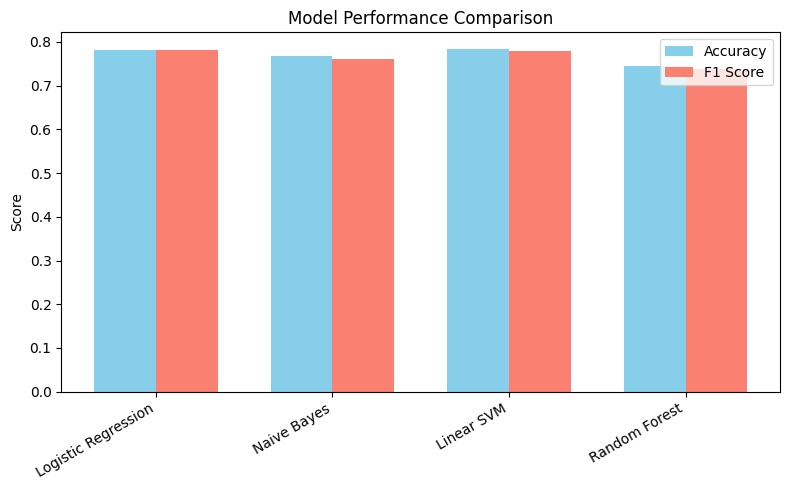

In [32]:
# 9. Plot graph
plt.figure(figsize=(8,5))
bar_width = 0.35
x = range(len(result_df))

plt.bar(x, result_df['Accuracy'], width=bar_width, label='Accuracy', color='skyblue')
plt.bar([i + bar_width for i in x], result_df['F1 Score'], width=bar_width, label='F1 Score', color='salmon')

plt.xticks([i + bar_width/2 for i in x], result_df['Model'], rotation=30, ha='right')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.tight_layout()
plt.show()

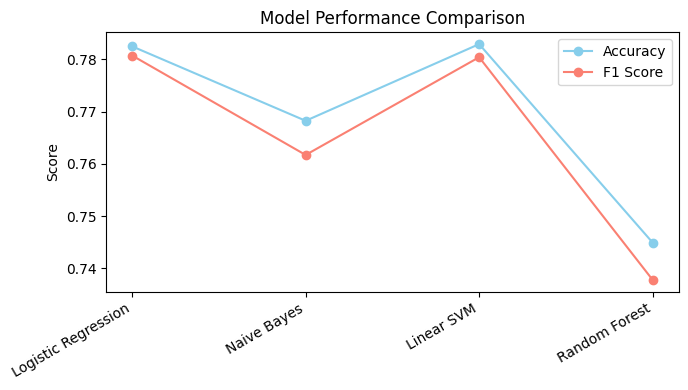

In [36]:
# 9. Plot graph
plt.figure(figsize=(7,4))
x = range(len(result_df))

plt.plot(x, result_df['Accuracy'], marker='o', linestyle='-', label='Accuracy', color='skyblue')
plt.plot(x, result_df['F1 Score'], marker='o', linestyle='-', label='F1 Score', color='salmon')

plt.xticks(x, result_df['Model'], rotation=30, ha='right')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.tight_layout()
plt.show()